In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [2]:
# Read in our charity data
charity_df = pd.read_csv("./Resources/charity_data.csv")
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop EIN columns as we can use name as the unique identifiers
charity_df = charity_df.drop(["EIN"], 1)

In [4]:
#Pre-processing the data.  Convert all categorical values 
charity_cat = charity_df.dtypes[charity_df.dtypes =="object"].index.tolist()
charity_df[charity_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [5]:
#Investigate classification values to determine if binning is required 
classification_count = charity_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
         ...  
C1256        2
C1267        2
C1234        2
C1246        2
C1248        1
C1236        1
C2190        1
C4500        1
C4120        1
C4200        1
C2600        1
C6100        1
C1580        1
C1820        1
C2500        1
C1283        1
C1370        1
C1728        1
C2170        1
C1900        1
C8210        1
C1732        1
C2561        1
C1245        1
C1570        1
C3700        1
C2380        1
C2570        1
C5200        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [6]:

#Due to the uneven distribution of CLASSIFICATION, will bucket the rare values into "other" category 
classification_count.plot.density()

In [7]:
# Based on density map, will bucket all values under 1000 into others 

bucket_classification = list(classification_count[classification_count<1000].index)
for classification in bucket_classification: 
    charity_df["CLASSIFICATION"] = charity_df["CLASSIFICATION"].replace(classification, "Other")

charity_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [8]:
#Check "Application Type" with 17 unique values to see if bucketing is needed 
application = charity_df["APPLICATION_TYPE"].value_counts()
application

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
#Check name column
names = charity_df.NAME.value_counts()
names

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

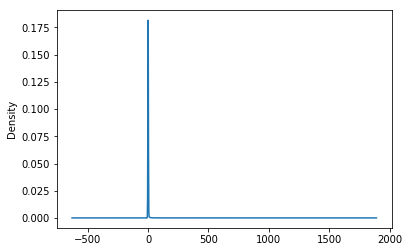

In [10]:
names.plot.density()

In [11]:
#bucket names 
bucket_names = list(names[names<100].index)
for name in bucket_names: 
    charity_df["NAME"] = charity_df["NAME"].replace(name, "Other")

charity_df["NAME"].value_counts()

Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
# encode all categorical values 
enc = OneHotEncoder(sparse = False)
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df

,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
#Merge the encoded dataframe back into main dataframe, drop the converted columns 
charity_df = charity_df.merge(encode_df, left_index = True, right_index = True)
charity_df = charity_df.drop(charity_cat, 1)

In [15]:
#split dataset into training and testing data. The target is to predict if the money is used effectively, so "IS_SUCESSFUL"
#will be the target 

y = charity_df['IS_SUCCESSFUL'].values
X=charity_df.drop("IS_SUCCESSFUL", axis = 1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [17]:
# standardize the data 

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#build neural network. The total number of rows is over 36,000, with 36 input dimensions.  Because of the large number of 
#input dimensions, I will build a neural network with 2 layers, first layer with 10 units and second with 8

input_features = len(X_train_scaled[0])
nodes_layer1 = 10
nodes_layer2 = 8

nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units = nodes_layer1, input_dim = input_features, activation = "relu"))
nn.add(tf.keras.layers.Dense(units = nodes_layer2, activation = "relu"))
nn.add(tf.keras.layers.Dense(units =1, activation = "sigmoid"))
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [19]:
#train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs = 50)
#evaluate model accuracy
model_loss, model_accuracy =nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 4s 154us/sample - loss: 0.5657 - accuracy: 0.7012
Epoch 2/50
25724/25724 [==============================] - 2s 86us/sample - loss: 0.5038 - accuracy: 0.7468
Epoch 3/50
25724/25724 [==============================] - 2s 85us/sample - loss: 0.4960 - accuracy: 0.7554
Epoch 4/50
25724/25724 [==============================] - 2s 81us/sample - loss: 0.4935 - accuracy: 0.7582
Epoch 5/50
25724/25724 [==============================] - 2s 81us/sample - loss: 0.4919 - accuracy: 0.7587
Epoch 6/50
25724/25724 [==============================] - 2s 91us/sample - loss: 0.4911 - accuracy: 0.7580
Epoch 7/50
25724/25724 [==============================] - 2s 86us/sample - loss: 0.4901 - accuracy: 0.7598
Epoch 8/50
25724/25724 [==============================] - 2s 90us/sample - loss: 0.4894 - accuracy: 0.7596
Epoch 9/50
25724/25724 [==============================] - 2s 90us/sample - loss: 0.4892 - accuracy: 0.7606
Epoch 10/50
2

In [20]:
# Accuracy is just above 75%, so attempt to see if any optimization can be achieved. 
#Optimization: 1) re-look at dataset to remove any noise

In [21]:
#Look at outliers for the ASK_AMT variable
amount = X.ASK_AMT.value_counts()
amount

5000        25398
10478           3
15583           3
6725            3
63981           3
90834           2
8181            2
27159           2
6960            2
43814           2
8746            2
15039           2
6920            2
32141           2
60000           2
9537            2
5006            2
27944           2
7287            2
238933          2
16435           2
195661          2
17614           2
5894            2
7003            2
46327           2
9255            2
5706            2
32807           2
17010           2
            ...  
63722           1
250095          1
14578           1
98565           1
53569816        1
1044779         1
49453           1
10544           1
590133          1
762177          1
4045122         1
715080          1
121166          1
348511          1
78195           1
768386          1
846216          1
801170          1
67988           1
151967          1
63914           1
806737          1
266679          1
498118          1
59848     

In [22]:
X.ASK_AMT.nunique()

8747

In [23]:
#Given the variation in this variable with over 8000 unique values, I'll bucket the value so that all amounts not equal to 5000 will be grouped together 

bucket_amount = list(amount[amount<25000].index)
for amt in bucket_amount: 
    X["ASK_AMT"] = X['ASK_AMT'].replace(amt, "Other")
X.ASK_AMT.value_counts()

5000     25398
Other     8901
Name: ASK_AMT, dtype: int64

In [24]:
X["ASK_AMT"] = X["ASK_AMT"].astype(str)
encode_amount = pd.DataFrame(enc.fit_transform(X["ASK_AMT"].values.reshape(-1,1)))
encode_amount.columns = enc.get_feature_names(['ASK_AMT'])
encode_amount.head()

,ASK_AMT_5000,ASK_AMT_Other
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [25]:
X = X.merge(encode_amount, left_index = True, right_index = True)

In [26]:

X=X.drop('ASK_AMT',1)
X.head()

,STATUS,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_Other
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
#Re-split, re-scale, and re-build the model with new dataset 

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:

input_features = len(X_train_scaled[0])
nodes_layer1 = 10
nodes_layer2 = 8

nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units = nodes_layer1, input_dim = input_features, activation = "relu"))
nn.add(tf.keras.layers.Dense(units = nodes_layer2, activation = "relu"))
nn.add(tf.keras.layers.Dense(units =1, activation = "sigmoid"))
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [29]:
fit_model = nn.fit(X_train_scaled, y_train, epochs = 50)
#evaluate model accuracy
model_loss, model_accuracy =nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 4s 142us/sample - loss: 0.5536 - accuracy: 0.7168
Epoch 2/50
25724/25724 [==============================] - 3s 127us/sample - loss: 0.5025 - accuracy: 0.7494
Epoch 3/50
25724/25724 [==============================] - 3s 113us/sample - loss: 0.4963 - accuracy: 0.7526
Epoch 4/50
25724/25724 [==============================] - 3s 116us/sample - loss: 0.4933 - accuracy: 0.7565
Epoch 5/50
25724/25724 [==============================] - 3s 103us/sample - loss: 0.4916 - accuracy: 0.7571
Epoch 6/50
25724/25724 [==============================] - 2s 91us/sample - loss: 0.4901 - accuracy: 0.7575
Epoch 7/50
25724/25724 [==============================] - 2s 94us/sample - loss: 0.4892 - accuracy: 0.7579
Epoch 8/50
25724/25724 [==============================] - 2s 97us/sample - loss: 0.4885 - accuracy: 0.7570
Epoch 9/50
25724/25724 [==============================] - 3s 112us/sample - loss: 0.4877 - accuracy: 0.7600
Epoch 10

In [30]:
#Very slight improvement.  
#Optimization 2: Add extra neurons to layer 1

new_nodes_layer1 = 20
nodes_layer2 = 8

nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units = new_nodes_layer1, input_dim = input_features, activation = "relu"))
nn.add(tf.keras.layers.Dense(units = nodes_layer2, activation = "relu"))
nn.add(tf.keras.layers.Dense(units =1, activation = "sigmoid"))
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs = 50)
#evaluate model accuracy
model_loss, model_accuracy =nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 4s 142us/sample - loss: 0.5309 - accuracy: 0.7321
Epoch 2/50
25724/25724 [==============================] - 3s 97us/sample - loss: 0.4968 - accuracy: 0.7515
Epoch 3/50
25724/25724 [==============================] - 3s 101us/sample - loss: 0.4928 - accuracy: 0.7556
Epoch 4/50
25724/25724 [==============================] - 3s 107us/sample - loss: 0.4906 - accuracy: 0.7559
Epoch 5/50
25724/25724 [==============================] - 3s 101us/sample - loss: 0.4887 - accuracy: 0.7575
Epoch 6/50
25724/25724 [==============================] - 3s 102us/sample - loss: 0.4873 - accuracy: 0.7579
Epoch 7/50
25724/25724 [==============================] - 3s 104us/sample - loss: 0.4862 - accuracy: 0.7596
Epoch 8/50
25724/25724 [==============================] - 3s 104us/sample - loss: 0.4859 - accuracy: 0.7599 - loss: 0.483
Epoch 9/50
25724/25724 [==============================] - 2s 97us/sample - loss: 0.4854 - accuracy: 

In [31]:
#SLight improvement
#Optimization 3: Try adding more neurons to second layer 

new_nodes_layer1 = 20
new_nodes_layer2 = 12

nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units = new_nodes_layer1, input_dim = input_features, activation = "relu"))
nn.add(tf.keras.layers.Dense(units = new_nodes_layer2, activation = "relu"))
nn.add(tf.keras.layers.Dense(units =1, activation = "sigmoid"))
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs = 50)
#evaluate model accuracy
model_loss, model_accuracy =nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 4s 138us/sample - loss: 0.5490 - accuracy: 0.7220
Epoch 2/50
25724/25724 [==============================] - 3s 101us/sample - loss: 0.4977 - accuracy: 0.7551
Epoch 3/50
25724/25724 [==============================] - 3s 104us/sample - loss: 0.4919 - accuracy: 0.7569
Epoch 4/50
25724/25724 [==============================] - 3s 126us/sample - loss: 0.4892 - accuracy: 0.7602
Epoch 5/50
25724/25724 [==============================] - 3s 113us/sample - loss: 0.4876 - accuracy: 0.7583
Epoch 6/50
25724/25724 [==============================] - 3s 109us/sample - loss: 0.4869 - accuracy: 0.7580
Epoch 7/50
25724/25724 [==============================] - 3s 113us/sample - loss: 0.4857 - accuracy: 0.7601
Epoch 8/50
25724/25724 [==============================] - 3s 128us/sample - loss: 0.4847 - accuracy: 0.7596
Epoch 9/50
25724/25724 [==============================] - 3s 128us/sample - loss: 0.4848 - accuracy: 0.7601
Epoch

In [32]:
#Performance dropped
#attempt a different activation method with previous nodes

new_nodes_layer1 = 20
nodes_layer2 = 8

nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units = new_nodes_layer1, input_dim = input_features, activation = tf.keras.layers.LeakyReLU(alpha=0.3)))
nn.add(tf.keras.layers.Dense(units = nodes_layer2, activation = tf.keras.layers.LeakyReLU(alpha=0.3)))

nn.add(tf.keras.layers.Dense(units =1, activation = "sigmoid"))
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs = 50)
#evaluate model accuracy
model_loss, model_accuracy =nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 4s 148us/sample - loss: 0.5403 - accuracy: 0.7210
Epoch 2/50
25724/25724 [==============================] - 3s 113us/sample - loss: 0.5003 - accuracy: 0.7460
Epoch 3/50
25724/25724 [==============================] - 3s 105us/sample - loss: 0.4959 - accuracy: 0.7531
Epoch 4/50
25724/25724 [==============================] - 3s 107us/sample - loss: 0.4938 - accuracy: 0.7529
Epoch 5/50
25724/25724 [==============================] - 3s 103us/sample - loss: 0.4930 - accuracy: 0.7553
Epoch 6/50
25724/25724 [==============================] - 3s 105us/sample - loss: 0.4915 - accuracy: 0.7565
Epoch 7/50
25724/25724 [==============================] - 3s 109us/sample - loss: 0.4902 - accuracy: 0.7577
Epoch 8/50
25724/25724 [==============================] - 3s 115us/sample - loss: 0.4900 - accuracy: 0.7578
Epoch 9/50
25724/25724 [==============================] - 3s 115us/sample - loss: 0.4888 - accuracy: 0.7579
Epoch

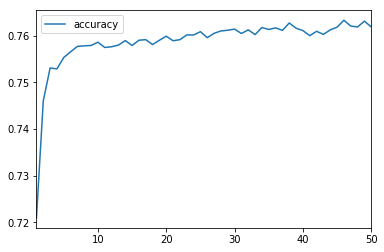

In [33]:
#Model performance dropped.  
#Plot the accuracy
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")


In [35]:
#Comparison with Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators = 128, random_state = 78)
rf_model = rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
print(f"Random forest predictive accuracy: {accuracy_score(y_test, y_pred):.3f}")

Random forest predictive accuracy: 0.754
